In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:\\Users\\exsxaxr\\Downloads\\Input Data Synthetic.xlsx")

In [3]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
df['Assignment group'].value_counts(ascending=True)

GRP_35       1
GRP_73       1
GRP_61       1
GRP_70       1
GRP_64       1
          ... 
GRP_9      252
GRP_12     257
GRP_24     289
GRP_8      661
GRP_0     3975
Name: Assignment group, Length: 74, dtype: int64

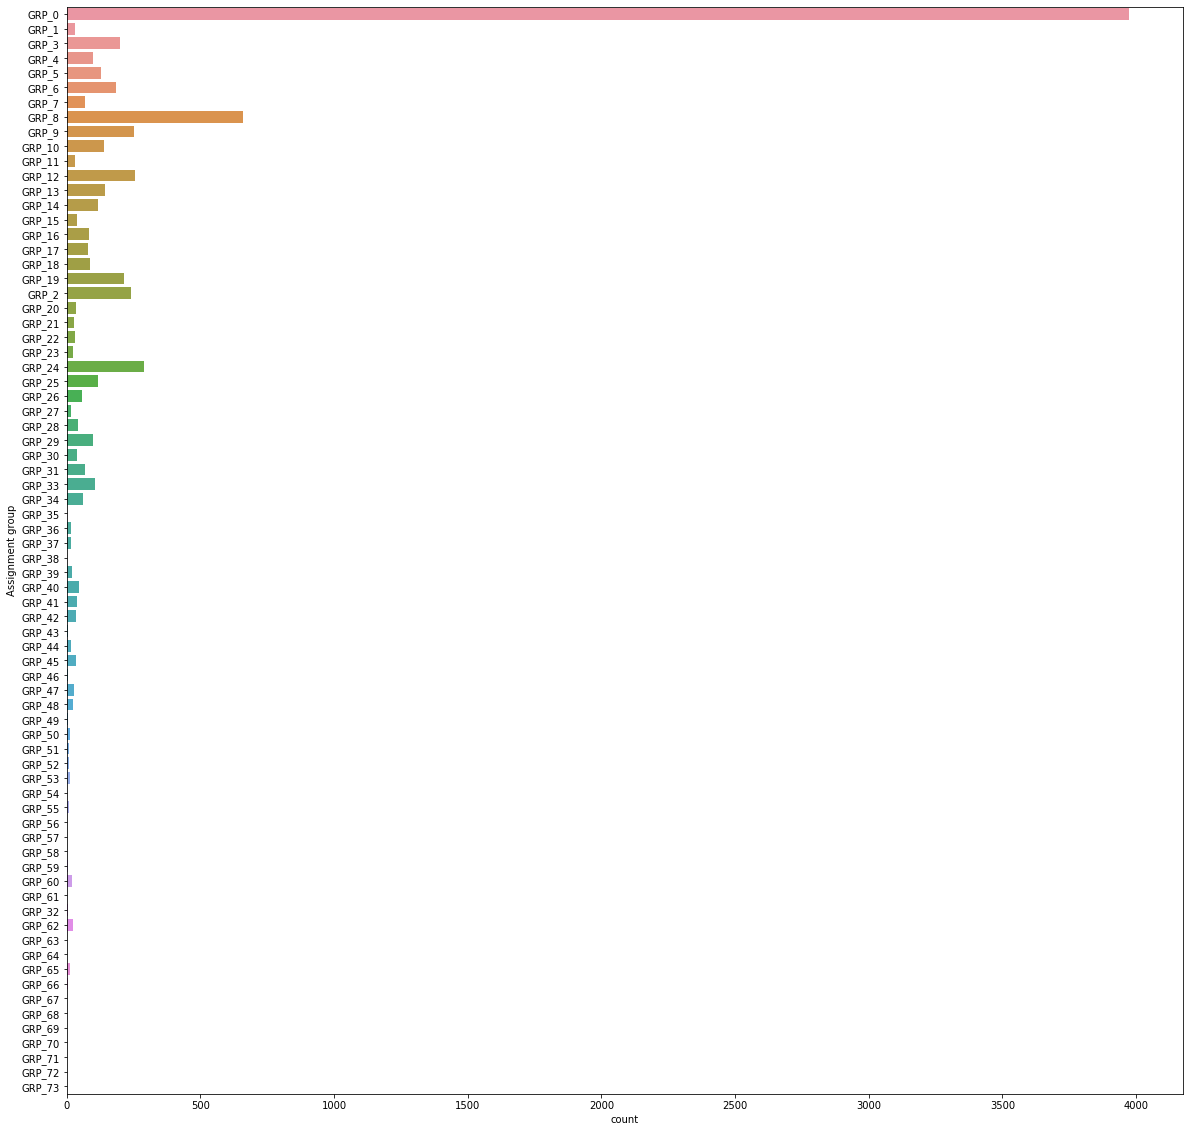

In [5]:
plt.figure(figsize=(20,20))
sns.countplot(y=df['Assignment group'])

In [6]:
df = df.drop(['Caller'], axis=1)

In [7]:
df.head()

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0
4,skype error,skype error,GRP_0


In [8]:
df[df.isnull().any(axis=1)]

,Short description,Description,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0


In [9]:
df.drop(df[df.isnull().any(axis=1)].index, inplace=True)

In [10]:
df.shape

(8491, 3)

In [11]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)

In [13]:
# Remove email id from description

import re
df['Description'] = df['Description'].apply((lambda x: re.sub('received from:.\S+@\S+','',x)))

In [12]:
# Convert into lower case and remove special charecters

df['Description'] = df['Description'].apply(lambda x: x.lower())
df['Description'] = df['Description'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x)))

df['Short description'] = df['Short description'].apply(lambda x: x.lower())
df['Short description'] = df['Short description'].apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x)))

In [14]:
# Find length of words in description and short description columns

df['Desc_len'] = df['Description'].apply(lambda x: len(x.split(" ")))
df['Short_desc_len'] = df['Short description'].apply(lambda x: len(x.split(" ")))
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,login issue,-verified user details.(employee# & manager na...,GRP_0,29,2
1,outlook,"\r\n\r\n\r\n\r\nhello team,\r\n\r\nmy meetings...",GRP_0,21,1
2,cant log in to vpn,\r\n\r\n\r\n\r\nhi\r\n\r\ni cannot log on to v...,GRP_0,7,5
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,5,5
4,skype error,skype error,GRP_0,3,3


In [15]:
# Remove Punctuation

import string
df['Short description']  = df['Short description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
df['Description']  = df['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

In [16]:
# Remove white spaces

df['Short description'] = df['Short description'].map(lambda x: x.strip())
df['Description'] = df['Description'].map(lambda x: x.strip())

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\exsxaxr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
# Tokenize into words

from nltk import word_tokenize

df['Short description'] = df['Short description'].map(lambda x: word_tokenize(x))
df['Description'] = df['Description'].map(lambda x: word_tokenize(x))

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\exsxaxr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [18]:
# filter out stop words

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['Short description'] = df['Short description'].map(lambda x: [w for w in x if not w in stop_words])
df['Description'] = df['Description'].map(lambda x: [w for w in x if not w in stop_words])

In [29]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\exsxaxr\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [19]:
# Word Lemmatization

from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
df['Short description'] = df['Short description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
df['Description'] = df['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

In [20]:
df.head()

,Short description,Description,Assignment group,Desc_len,Short_desc_len
0,"[login, issue]","[verify, user, detailsemployee, manager, name,...",GRP_0,29,2
1,[outlook],"[hello, team, meetingsskype, meet, etc, appear...",GRP_0,21,1
2,"[cant, log, vpn]","[hi, log, vpn, best]",GRP_0,7,5
3,"[unable, access, hrtool, page]","[unable, access, hrtool, page]",GRP_0,5,5
4,"[skype, error]","[skype, error]",GRP_0,3,3
